In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train_data = pd.read_csv('C:\\Users\\ankur_vc1xnom\\Desktop\\LP4\\LP-IV-datasets\\MNIST(Ass2&3)\\mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\ankur_vc1xnom\\Desktop\\LP4\\LP-IV-datasets\\MNIST(Ass2&3)\\mnist_test.csv')

In [13]:
train_data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [22]:
xtr = train_data.drop('label', axis = 1).values
xts = test_data.drop('label', axis = 1).values

In [23]:
xtr.shape

(60000, 784)

In [24]:
ytr = train_data['label'].values
yts = test_data['label'].values

In [25]:
xtr, xts = xtr/255.0, xts/255.0

In [26]:
ytr = to_categorical(ytr, 10)

In [27]:
yts = to_categorical(yts, 10)

In [30]:
model = Sequential(
    [
        Flatten(input_shape =  (784,)),
        Dense(128, 'relu'),
        Dense(64, 'relu'),
        Dense(32, 'relu'),
        Dense(10, 'softmax')
    ]
)

C:\Users\ankur_vc1xnom\Desktop\LP4\dlenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(xtr, ytr, epochs = 5, validation_data = (xts, yts))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5981 - loss: 1.2855 - val_accuracy: 0.9102 - val_loss: 0.3103
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9119 - loss: 0.3025 - val_accuracy: 0.9322 - val_loss: 0.2339
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9361 - loss: 0.2214 - val_accuracy: 0.9428 - val_loss: 0.1897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9482 - loss: 0.1821 - val_accuracy: 0.9519 - val_loss: 0.1615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1559 - val_accuracy: 0.9549 - val_loss: 0.1444


In [34]:
tl, ta = model.evaluate(xts, yts)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1709


In [35]:
tl

0.144440159201622

In [36]:
ta

0.9549000263214111

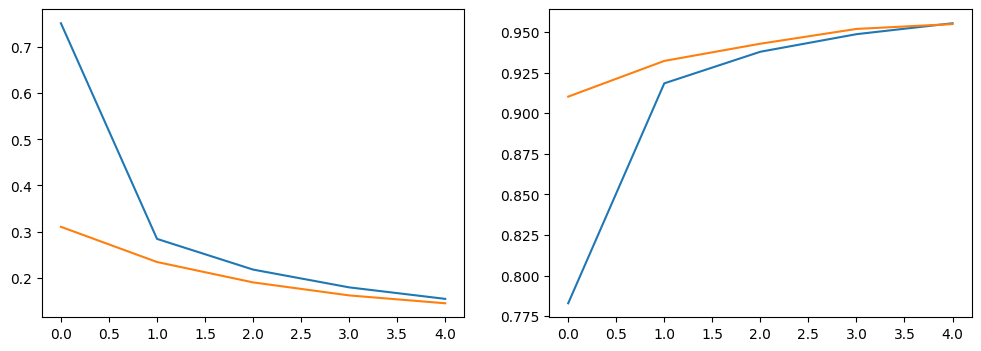

In [39]:
plt.figure(figsize=  (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()